## Fire Spread on Percolation Theory and Reinforcement Learning Applications

--------------------------------------
# Collaborators

## Sebastian Carrillo Mejia
## Santiago Ramirez Gaviria

--------------------------------------

Forest fire management is a critical ecological and economic challenge. This study proposes a novel approach to controlling fire propagation on a square lattice using reinforcement learning (RL). The fire spreads based on percolation theory, while the RL agent, trained with Proximal Policy Optimization (PPO), aims to minimize damage by extinguishing individual cells at each timestep. To address the high-dimensional nature of the problem, we implement a convolutional neural network (CNN) to extract spatial features from the environment, represented as a multi-layer tensor. The PPO algorithm, with its clipping property, ensures stable policy updates in the stochastic environment. This work highlights the potential of integrating deep learning with RL to tackle complex, dynamic systems and suggests avenues for further research in fire management and percolation-based simulations.

The source code can be found on the GitHub repository: https://github.com/S3b4sc/ForestFire_RL}{https://gitlab.com/sebastian.carrillo1/fc\_forest


## Key words


Forest fire, Percolation theory, computational simulation, Convolutional neural network, Reinforcement learning, Proximal Policy Optimization.

## INTRODUCTION

Forest fires are one of the most devastating natural phenomena, causing significant ecological, economic, and social damage worldwide. Effective fire management strategies are critical for minimizing these impacts, but they remain a challenging task due to the complex, dynamic nature of fire propagation. Understanding and mitigating fire spread require not only physical models but also intelligent decision-making systems capable of adapting to evolving conditions.

In this work, we address the problem of controlling fire propagation a two-dimensional square lattice, where fire propagates based on the principles of percolation theory. Percolation theory provides a robust framework to model the spread of fire, capturing its stochastic behavior and dependence on local connectivity. However, determining the optimal actions to minimize fire damage on such a grid introduces significant computational challenges, particularly as the size of the environment increases. Traditional reinforcement learning (RL) methods, such as Q-learning, struggle with these high-dimensional state-action spaces due to the exponential growth of combinations.

To overcome these limitations, we employ Proximal Policy Optimization (PPO), a modern RL algorithm known for its stability and efficiency in complex, high-dimensional problems. PPO’s clipping mechanism ensures that policy updates remain within a controlled range, preventing divergence during training. Additionally, we represent the environment as a multi-layer tensor, where each layer corresponds to a specific feature of the grid (e.g., healthy trees, burning cells). This tensor-based approach allows us to leverage convolutional neural networks (CNNs) for feature extraction, enabling the agent to interpret the spatial structure of the environment and make informed decisions.

Our primary contributions are as follows:


- A reinforcement learning framework for fire suppression on a percolation-based lattice.
- An efficient feature extraction mechanism using a CNN for high-dimensional observation spaces.
- Computational results demonstrating the effectiveness of PPO in managing fire spread in the lattice.


This paper is organized as follows. Section 2 describes the methods, including the environment, agent design, and training setup. Section 3 presents the results and discussion of our experiments. Finally, Section 4 concludes the paper with a summary of key contributions.

## Methodology

## Percolation theory [1]


Percolation theory is a branch of statistical physics with various applications; here, we introduce a simple model for fire spread.

Imagine a square lattice, similar to the grid on a large sheet of graph paper. Each square can be in one of four possible states: it can be occupied by either a burnable or a non-burnable entity. These states are assigned at random, with the probability of a site being burnable denoted as $\rho$ (a real value between zero and one).

Now, we define the rules governing fire spread. A burning cell can propagate fire to its first, second, or even third neighbors. For simplicity, let us consider only first neighbors (or nearest neighbors), which are the cells directly above, below, to the left, and to the right of the burning cell.

When there exists a connected path of burnable sites that spans from one side of the lattice to the opposite side, we call it a percolating cluster.
The critical value of $\rho$ required for such a cluster to form depends on the characteristics of the lattice. For a square lattice, this value is approximately $\rho_c = 0.59$. However, $\rho_c$ varies based on the system's nature. If we include second-neighbor connections, $\rho_c$ decreases. Additionally, different tessellation geometries—such as triangular, hexagonal, or Voronoi tessellations—have their own percolation thresholds $\rho_c$, each with distinct properties.


## Finite Markov Decision Processes [2]


Finite Markov Decision Processes (MDPs) provide a mathematical framework for modeling sequential decision-making problems, where actions influence not only the immediate state of the environment but also future states. These processes are defined by a tuple $(S, A, P, R, \gamma)$, where:


- $S$ is a finite set of states.
- $A$ is a finite set of actions.
- $P(s' | s, a)$ is the transition probability, representing the probability of moving from state $s$ to state $s'$ after taking action $a$.
- $R(s, a)$ is the reward function, defining the expected reward received after taking action $a$ in state $s$.
- \$gamma \in [0,1]$ is the discount factor, determining the importance of future rewards.


In reinforcement learning, an agent interacts with an environment modeled as an MDP. The agent selects actions according to a policy $\pi_\theta(a | s)$, which defines the probability of taking action $a$ in state $s$. The goal is to find an optimal policy $\pi_\theta^*$ that maximizes the expected cumulative reward, also known as the return:
\begin{equation}
G_t = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1}.
\end{equation}

To determine the optimal policy, we define the state-value function $V_\pi(s)$ and the action-value function $Q_\pi(s, a)$:
\begin{equation}
V_\pi(s) = \mathbb{E}_\pi \left[ \sum_{k=0}^{\infty} \gamma^k R_{t+k+1} \mid S_t = s \right],
\end{equation}
\begin{equation}
Q_\pi(s, a) = \mathbb{E}_\pi \left[ \sum_{k=0}^{\infty} \gamma^k R_{t+k+1} \mid S_t = s, A_t = a \right].
\end{equation}

A fundamental equation in reinforcement learning is the Bellman equation, which recursively defines the value function:
\begin{equation}
V_\pi(s) = \sum_{a \in A} \pi(a | s) \sum_{s' \in S} P(s' | s, a) \left[ R(s, a) + \gamma V_\pi(s') \right].
\end{equation}

Similarly, the Bellman optimality equation for the optimal policy $\pi^*$ is given by:
\begin{equation}
V^*(s) = \max_{a \in A} \sum_{s' \in S} P(s' | s, a) \left[ R(s, a) + \gamma V^*(s') \right].
\end{equation}

These equations provide the foundation for solving MDPs in reinforcement learning. The agent must balance exploration (trying new actions) and exploitation (choosing the best-known action sometimes known as greedy actions) to converge to an optimal policy. By using methods such as dynamic programming, Monte Carlo methods, or temporal difference learning, the agent can learn an optimal decision-making strategy in stochastic environments.


## Proximal Policy Optimization [3]


Proximal Policy Optimization (PPO) is a policy gradient method that improves sample efficiency and stability by constraining policy updates.

We understand the Policy as a function that defines the probability of taking an action $a$ given a state $s$; PPO models the policy as a neural network that outputs a probability distribution over actions (e.g., softmax over actions).

For example, for discrete spaces, we can express the policy as a stochastic function $\pi$ as follows:

$$
    \pi_\theta (a|s) = P(A=a|S=s;\theta)
$$

PPO improves the policy iteratively by adjusting $\theta$ to maximize the expected cumulative reward. Here, the key innovation of this proposal is the clipped objective function, which ensures updates on the policy are not too drastic, avoiding instability.

The clipped surrogate objective function that prevents large updates is:

$$
    L(\theta) = \mathbb{E} \left[ \min \left( r_t(\theta) A_t, \text{clip}(r_t(\theta), 1-\epsilon, 1+\epsilon) A_t \right) \right]
$$

Where:

- $ r_t(\theta) = \frac{\pi_\theta(a_t|s_t)}{\pi_{\theta_{\text{old}}}(a_t|s_t)} $ is the importance sampling ratio
- $\epsilon $ is a small trust region parameter
- $ A_t $ is the advantage function, which tells us how much better an action is compared to the average action.

The advantage function $A_t$ is typically computed as the difference between the action-value function $Q(s_t, a_t)$ and the state-value function $V(s_t)$:

$$
    A_t = Q(s_t, a_t) - V(s_t)
$$

The gradient update using this surrogate clipping function is:

$$
    \theta \leftarrow  \theta + \alpha \sum_t \nabla_\theta L(\theta)
$$

Note that if $ r_t(\theta) $ goes outside $[1-\epsilon, 1+\epsilon]$, the objective function stops increasing. This ensures that updates are controlled and not too large, improving stability. The process is repeated until convergence.

PPO's clipped objective helps avoid the high variance typically associated with policy gradient methods, allowing for more stable training and improved sample efficiency.

-----------------------------
Algorithm

-----------------------------
$\textbf{for}$ $iteration = 1,2...$  $\textbf{do}$

$\quad \textbf{for}\,\, factor = 1,2...,N\,\,  \textbf{do}$

$\quad \quad Run\,\, Policy\,\, \pi_{\theta_{old}} \,\, in\,\,environment\,\,for\,\,T\,\, time\,\, steps$

$\quad \quad \,\, Compute \,\,advantage\,\,estimates\,\,\hat{A_1},...,\hat{A_T}$

$\quad \textbf{end for}$

$\quad Optimze\,\,surrogate\,\,L\,\,wrt\,\,\theta\,\,k\,\,epochs\,\,and\,\,minibatch\,\,size\,\,M\,\,≤NT$

$\quad \theta_{old} ← \theta$

$\textbf{end for}$


-----------------------------

## Feature Extraction (CNN)


To extract information from the environment, the agent must have a feature extraction method. This method depends on the nature of the environment. In this case, given the spatial structure of the 2D matrix environment, it is convenient to define a convolutional neural network to analyze the system more effectively when extracting features from the current state.


## Simulation Details


To implement the model, we used Python's library of stable\_baselines3, which is a set of implementations for reinforcement learning in PyTorch.

The code implemented numpy's tensor notation and used matplotlib to create the visualizations.

The combination of action and observation space increases significantly with the grid size, making the system too complex for regular tabular methods like Q-learning not to mention memory storage.

Therefore, a few low-cost computational decisions were made.

Initially, we considered small square lattices, such as a 10 by 10 grid and a $15\times15$ grid for testing purposes, then a $35\times35$ grid was implemented still obtaining good results.

Another parameter is the $p_{bond}$ value, considered to be $0.55$. On square lattices, this value is above the percolation threshold, so the fire spread should, in most cases, be devastating.

Additionally, we considered that the agent can only act on the environment after a few iterations have passed to be more consistent with real-life applications. This parameter can be modified in the code if desired; we used three initial iterations.

## Results and Discussion

## Agent Performance


The agent was able to extract the necessary information from the environment to analyze and take probability-driven actions.

However, there were some issues with the agent's training time.

The action-observation space increases significantly when the grid size is incremented. In the code, we can specify the number of decisions or actions the agent must take to construct the policy. It executed several episodes before stopping. Given the stochastic nature of the environment, the agent must consider a considerable number of possible decisions and environment features. Therefore, when creating fire spread simulations for a $50\times50$ lattice, the training time required to obtain decent results extends to four days, whereas for a $20\times20$ lattice, satisfactory results can be achieved after three hours of training.

The initial test training resulted in poor agent performance despite the extended training time. After further analysis, we discovered that the method the agent uses to extract features from the environment is crucial. By default, this is achieved using a dense neural network, but this method is not capable of extracting spatial information effectively for our type of environment. Since the environment can be interpreted as an image, we implemented a convolutional neural network. This method proved to be successful, reducing the training time and significantly improving results.

Moreover, the model performed very well. The possible state-action combinations are incredibly high, and the model cannot be trained on all possible scenarios even once. Therefore, it has the challenging task of correctly generalizing and performing well when tested on new scenarios within the same training environment. In this case, the PPO agent proved to be effective and demonstrated the importance of using its clipping surrogate function to avoid divergence in highly complex systems.

Lastly, the reward criteria is one of the core ideas behind this algorithm; it represented an important step in the process and required several changes in the code. This modification should be carefully considered. Initially, given the poor performance of the model, it was repeating actions, which is not ideal. It makes no sense to turn off the fire by creating vacancies on the same area that is already empty. We initially thought the agent was not very intelligent and proposed penalizing repeated actions. However, rather than solving the problem, this approach made it worse. When we penalized repeated actions, the agent was penalized for repeating actions during training, so the best actions were those that hadn't been tried yet. As a result, the agent was only learning to avoid repeating actions, rather than actually mitigating the fire. After exploring many possibilities, the best solution turned out to be simplifying the reward model by simply penalizing the portion of the burned forest. This update significantly improved the model's performance, showing that sometimes the simplest solutions can yield the best results.

On small lattices we could find that the agent could leanr the basic ideas to prevent fire propagation, as you can see on the following gif.

In [ ]:
# @title
from IPython.display import Image

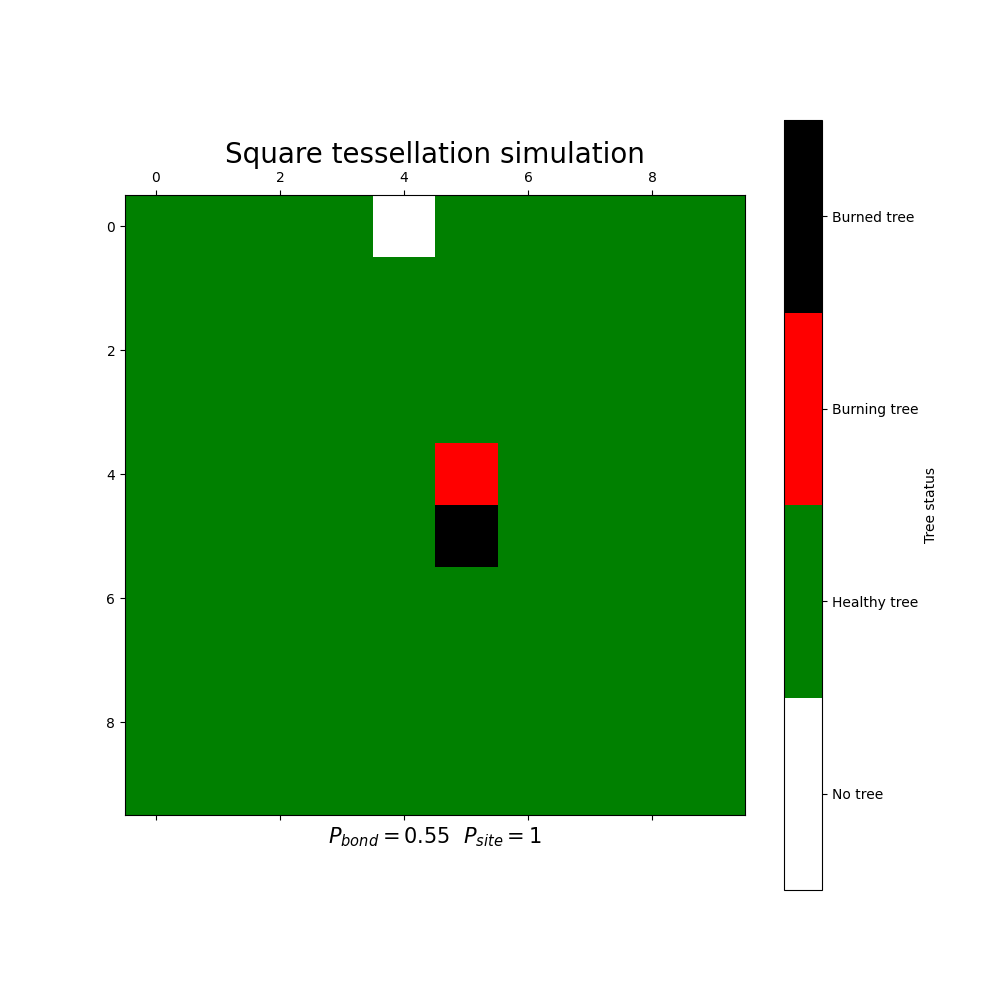

In [ ]:
# @title
Image(open('animation_1.gif','rb').read(), width=500)

Since the fire spread starts with a single burning cell in the middle of the lattice, when the model is trained for motre iterations it learned thwt turning that initial fire is the best possible scenario

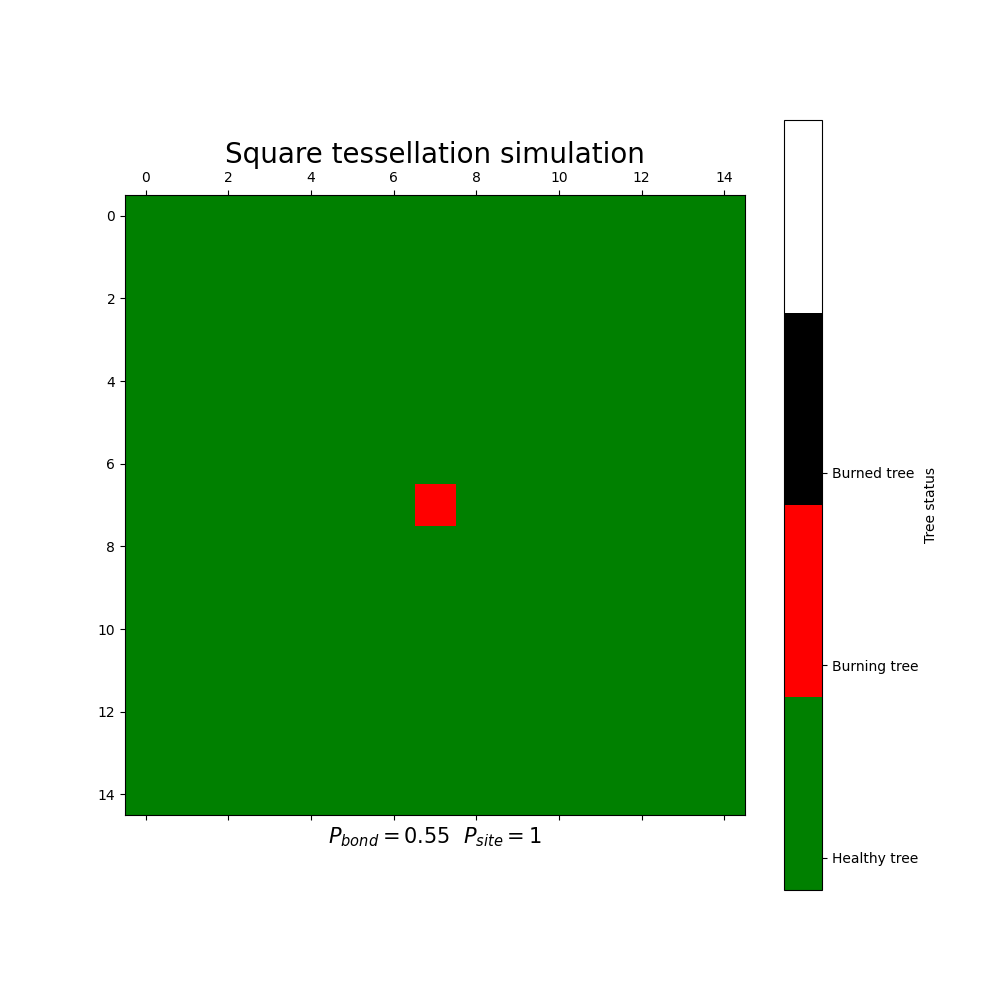

In [ ]:
# @title
Image(open('animation_4.gif','rb').read(), width=500)

To avoid this issue, we decided to turn on two cells for the initial fire, so the fire is already spreading in more than one cell when the agent starts to act, but,for bigger tessellations, you must notice that using a single vacant cell per iteration is not sufficient to mitigate fire spread, although the agent could still extighuish the fire, as shown the following two gifs.

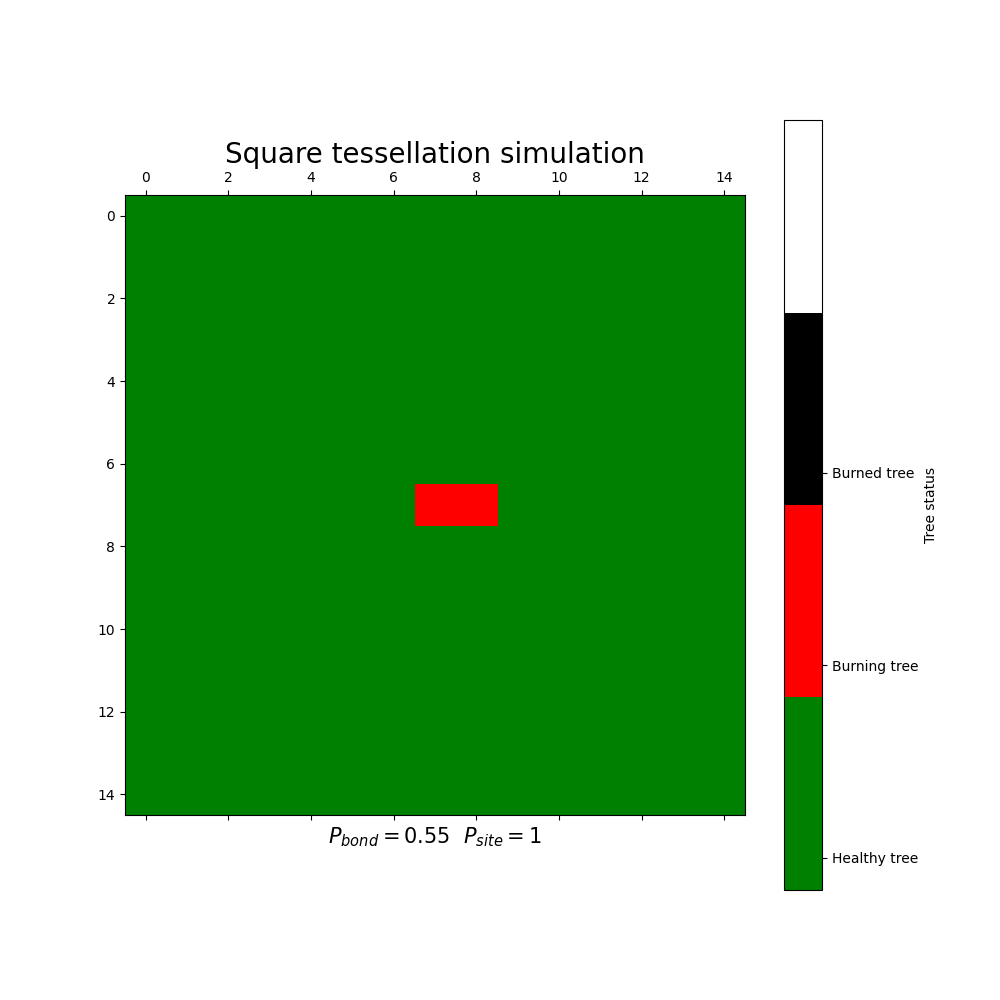

In [ ]:
# @title
Image(open('animation_8.gif','rb').read(), width=500)

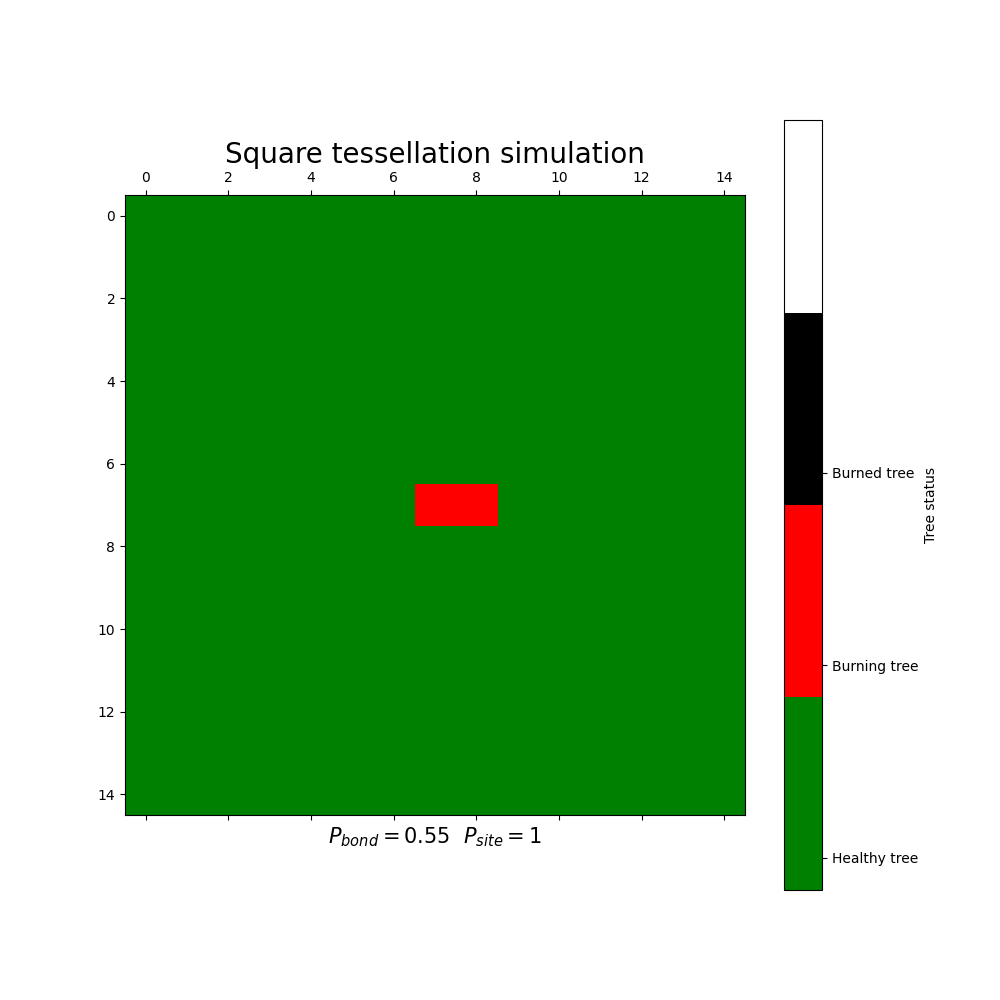

In [ ]:
# @title
Image(open('animation_7.gif','rb').read(), width=500)

To increment the dificulty on the taskand see how the agent could manage more complex scenarios, we proposed a model where the agent can only take cesicions after some interations have past.

The problem on this approach, as we mentioned before is that one single cell is not enough to turn off the fire when this one is too big.

We then implemented the four possible figures the agent could use to mitigate fire spread, these figures are basis three cells structures, as shown in the following gif.

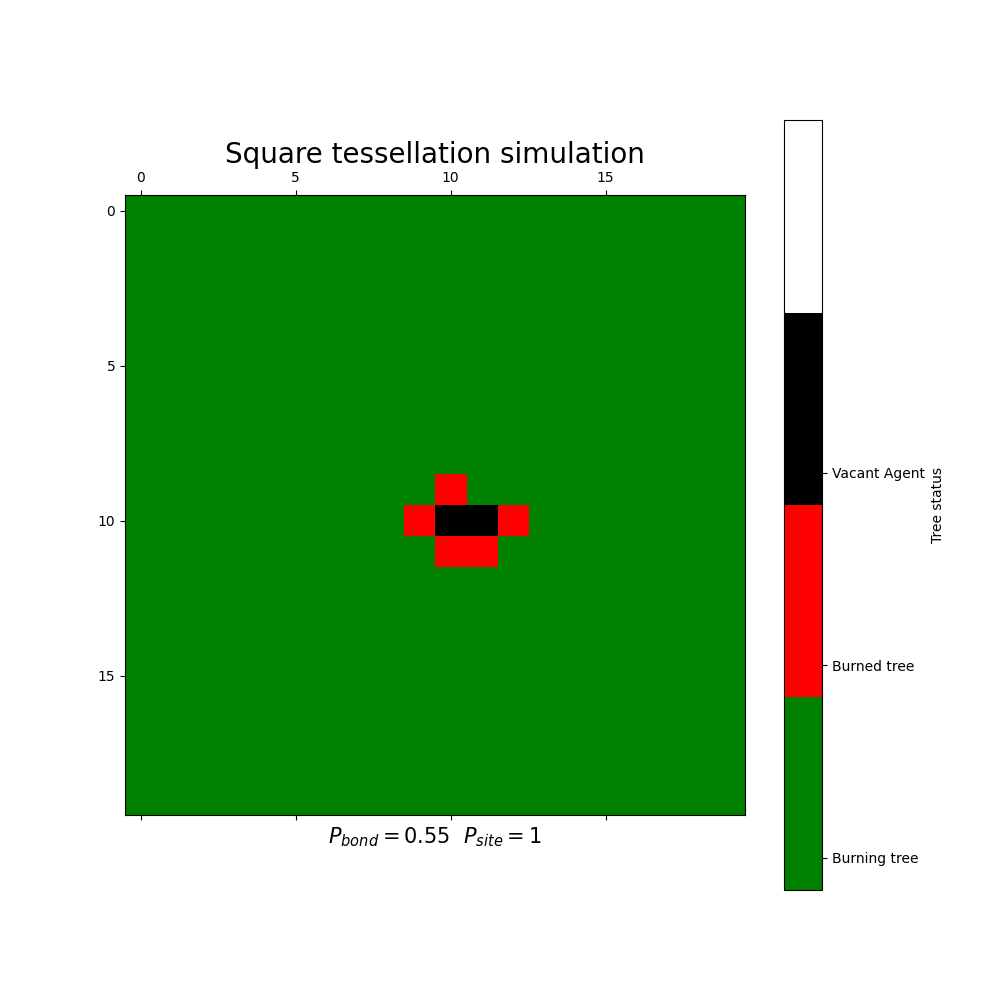

In [ ]:
# @title
Image(open('animation_20_3.gif','rb').read(), width=500)

These are other animations to rpove the model's performance

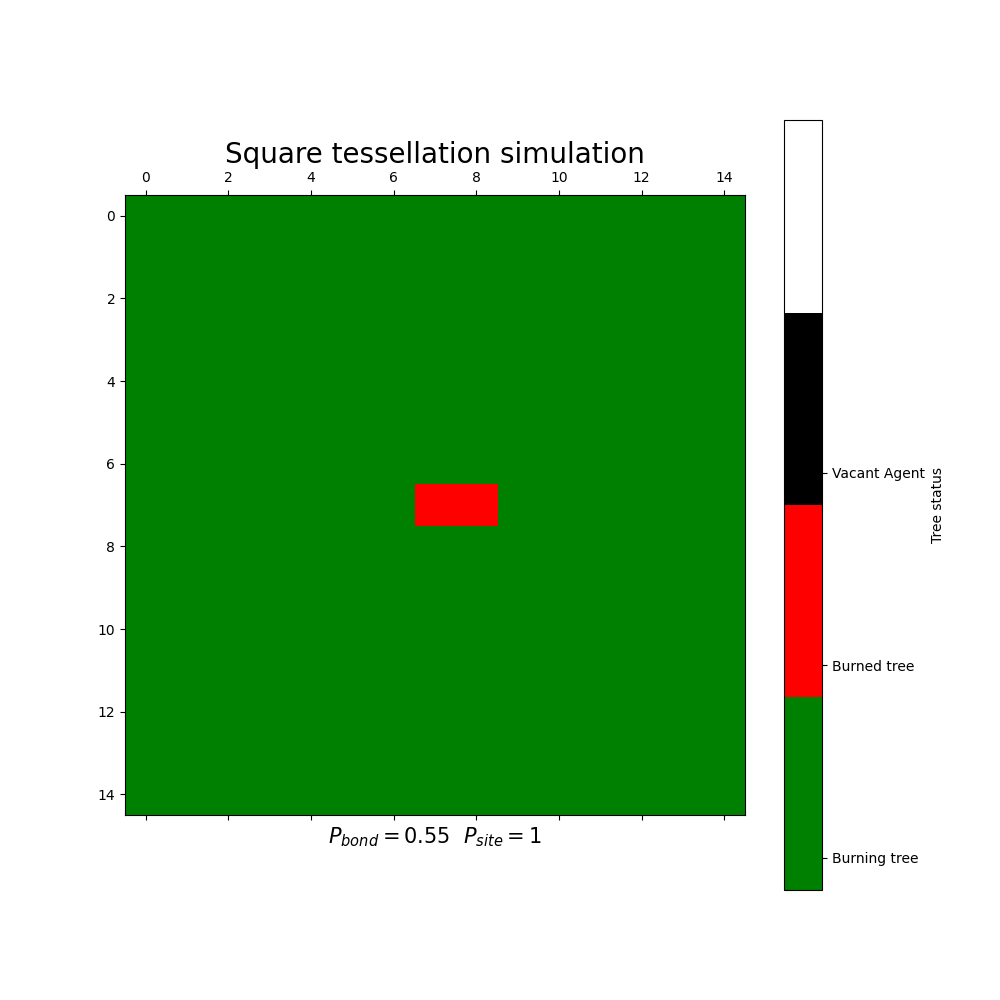

In [ ]:
Image(open('animation_expo.gif','rb').read(), width=500)

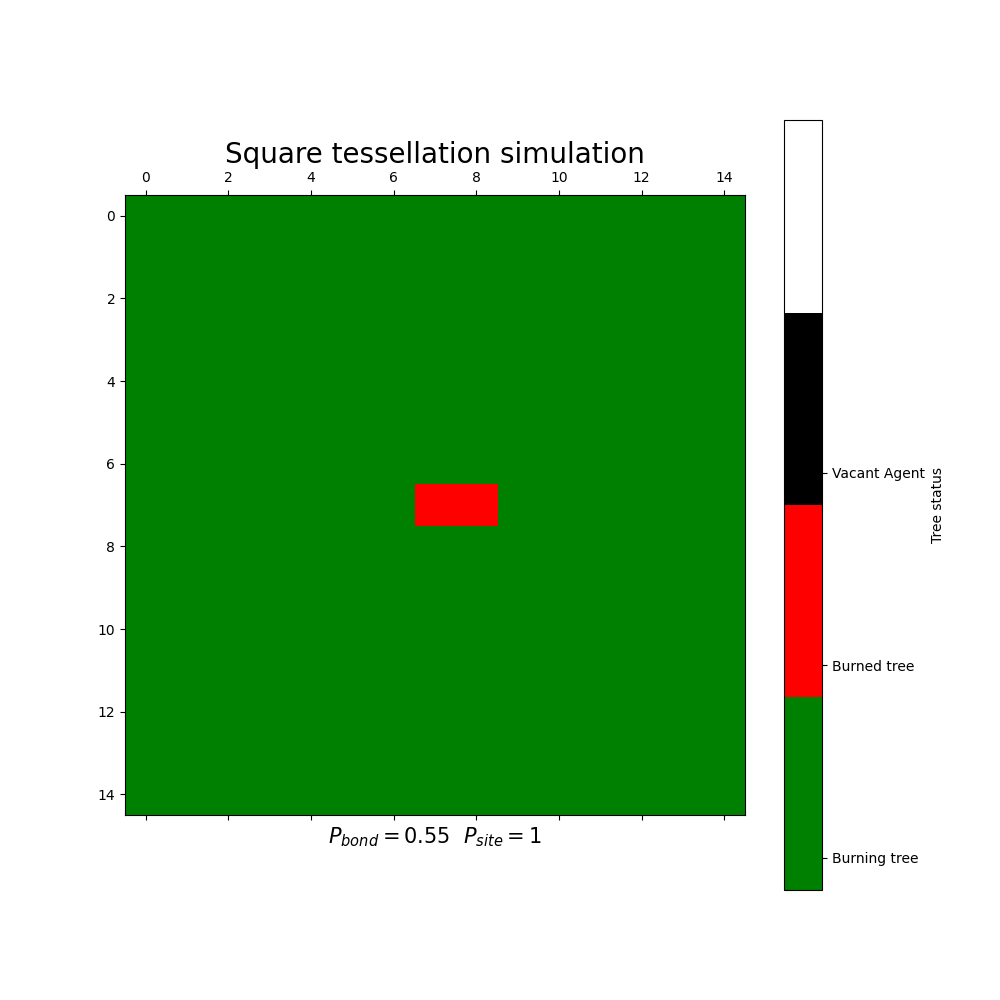

In [ ]:
Image(open('animation_expo_3.gif','rb').read(), width=500)

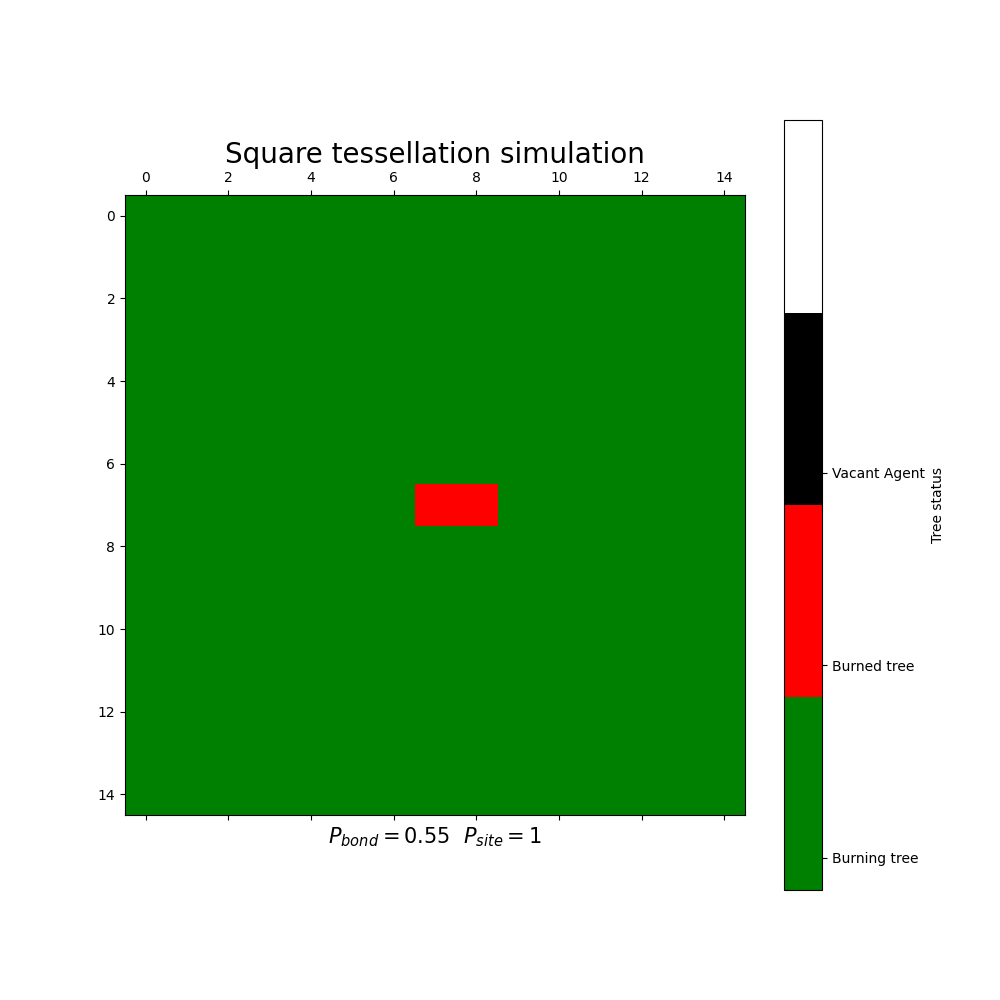

In [ ]:
Image(open('animation_expo_5.gif','rb').read(), width=500)

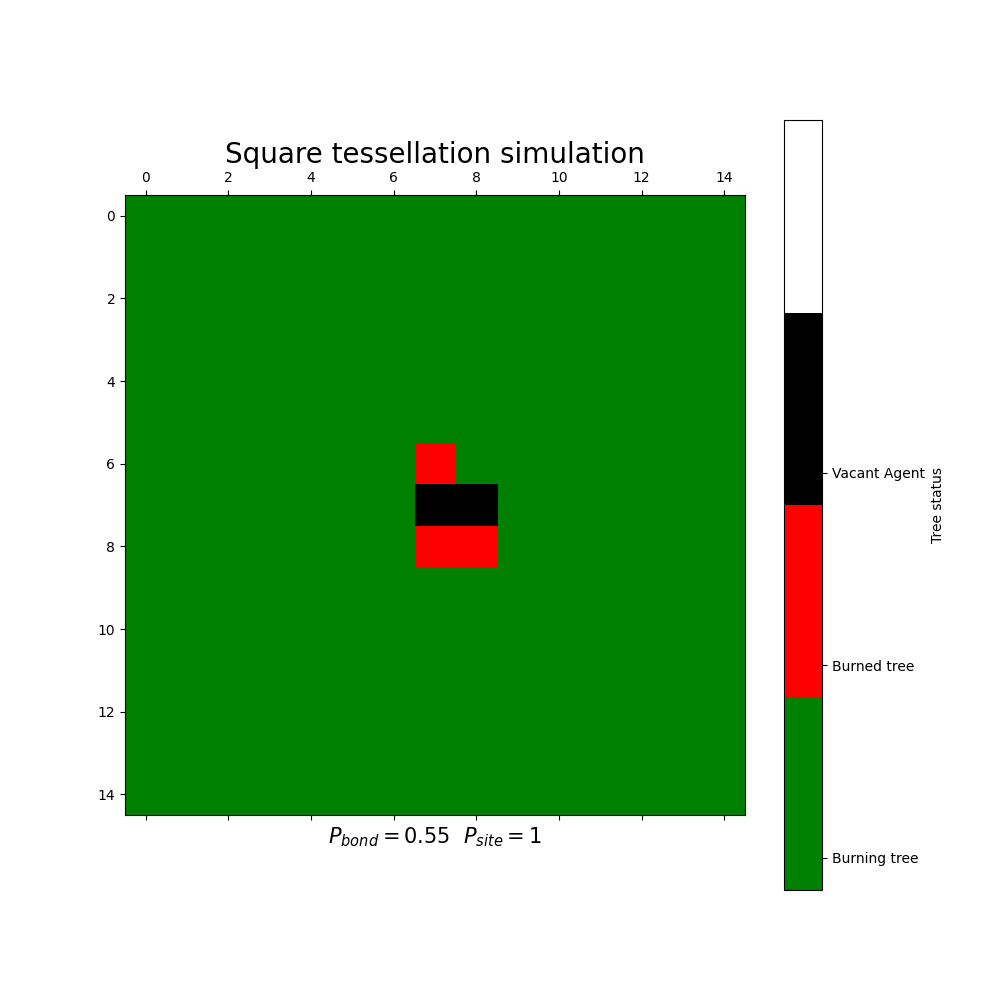

In [ ]:
Image(open('animation_expo_6.gif','rb').read(), width=500)

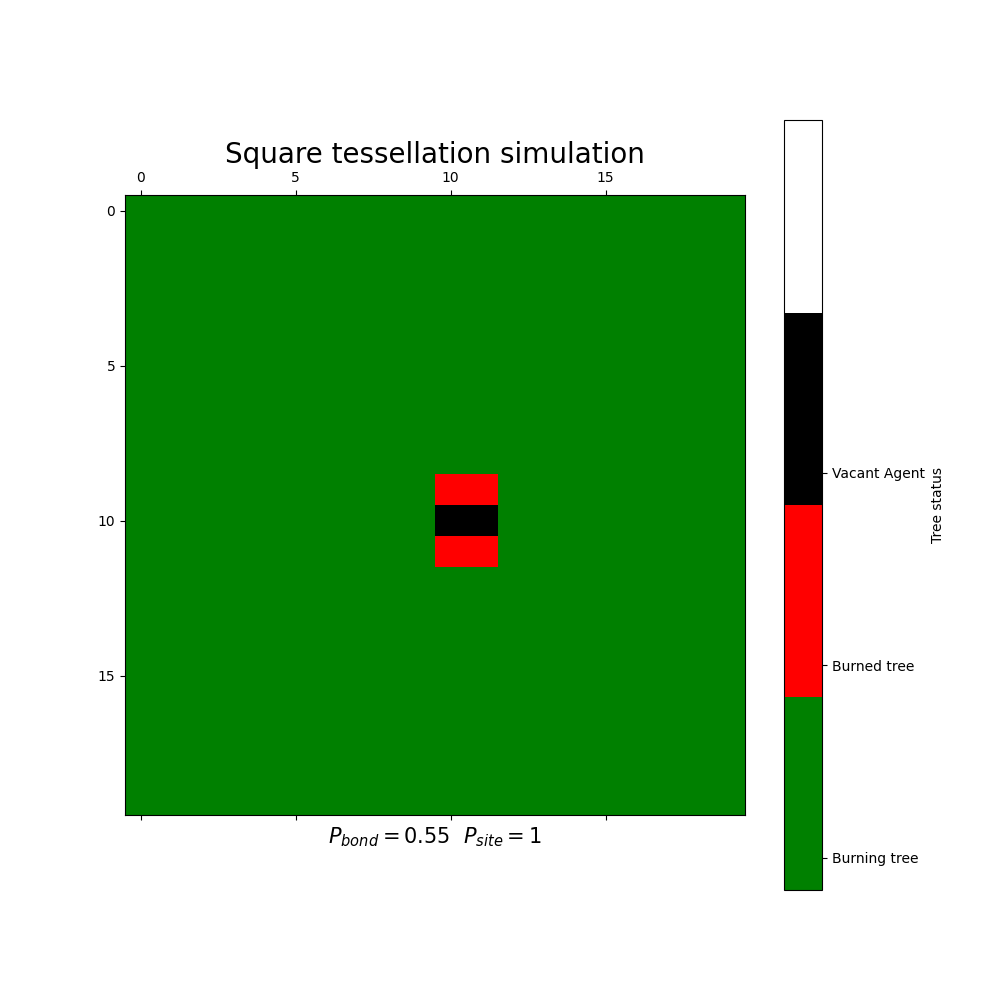

In [ ]:
Image(open('animation_expo_7.gif','rb').read(), width=500)

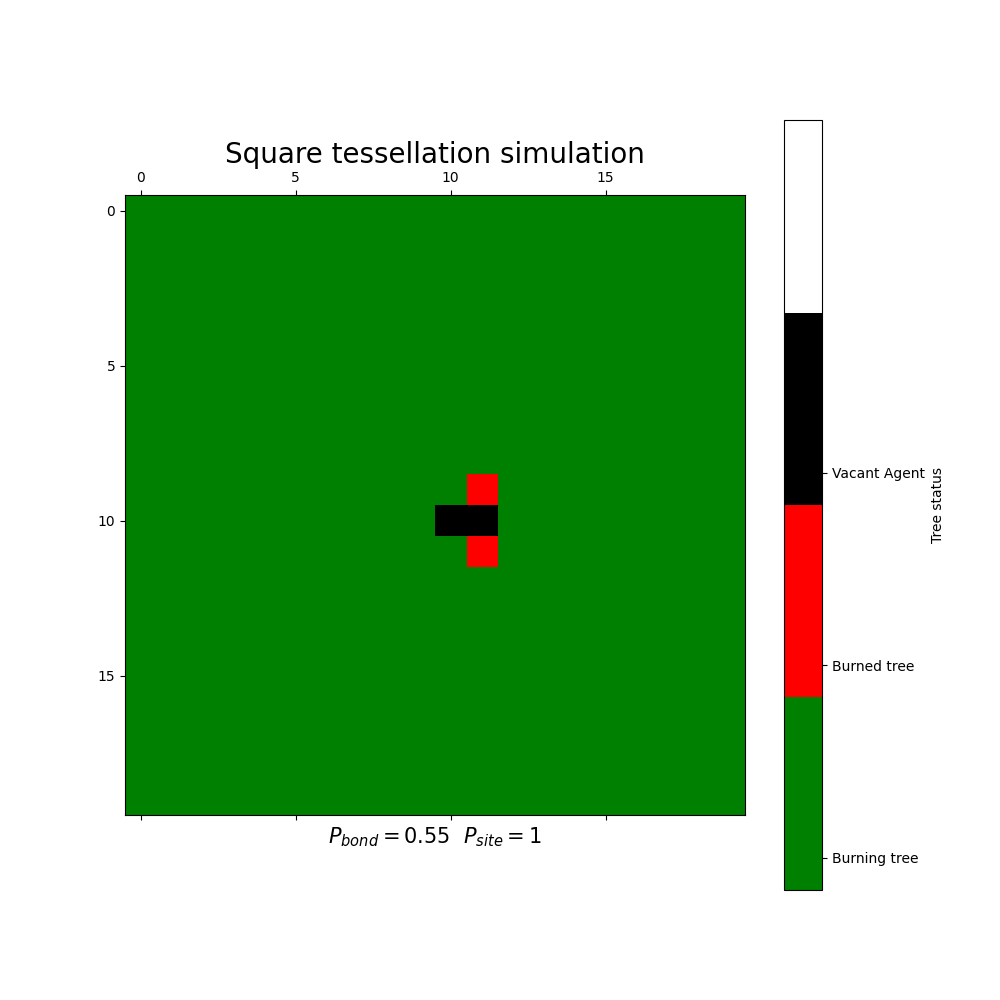

In [ ]:
Image(open('animation_expo_9.gif','rb').read(), width=500)

Now, we present the convergency of the reward function as a function of the episoded while training the agent, for which we can see, the agent is capable of learning from the environment enhancing it's rewards over time for a $20\times20$ lattice.

Since the reard system is only based on penalizing the portion of burned forest, the bets possible scenario is that there are not burned threes.

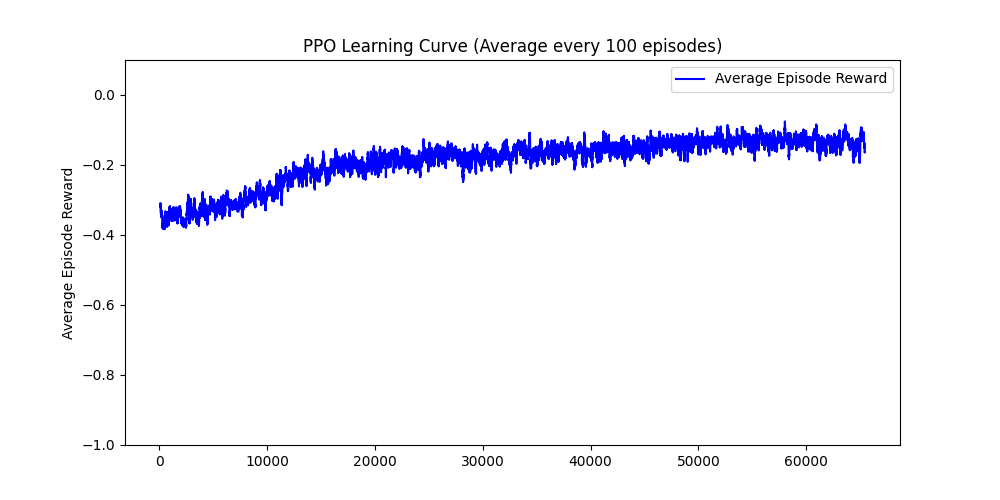

In [ ]:
# @title
Image(open('Learning_curve_20.png','rb').read(), width=650)

We also implemented a model where the the reward is only based and penalizing the propagation time, the learning curve is shown below.

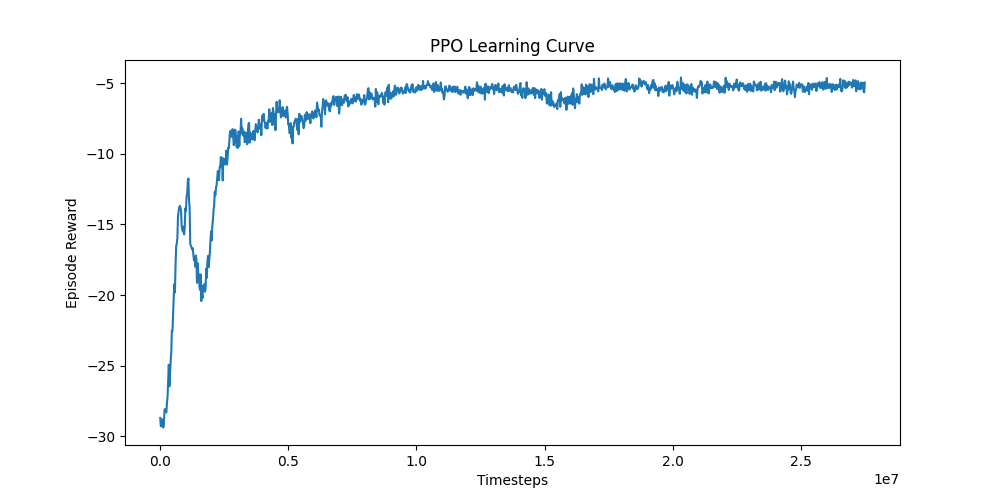

In [ ]:
Image(open('Learning_curve_2.png','rb').read(), width=650)

## Percolation Theory Model


The percolation model proved to be a good starting point for implementing the capabilities of a Reinforcement Learning algorithm, as it provided a stochastic model that is inherently complex to learn from.

This model was well-suited to the agent's needs and demonstrates how human intuition is not always the best criterion to rely on when making important decisions. This model has been widely used for statistical physics studies and has proven its worth in studying critical phenomena.

This model provided a strong example of how deep learning and statistical learning can be applied to real-life problems that are relevant to preserving life.

## Validation
The code validation was performed by running more robust simulations. The PPO agent was trained using different square lattices. Here, we present a brief report on the results of these tests.

- $15 × 15$ lattice: The agent demonstrated satisfactory performance after 1,000,000 time steps. We observed that by 1,500,000 training steps, the agent had already learned sufficiently. The estimated training time was approximately one and a half hours.

- 20 × 20 lattice: Here, we increased the complexity of the environment to better align the model with real-life scenarios. The idea was to allow the fire to propagate for a few initial time steps before the agent could intervene, ensuring that it only acted after the fire had already consumed part of the forest. We conducted trials with three initial time steps.

The agent’s performance decreased significantly when trained for 1,000,000 time steps, requiring additional training to achieve better results. Ultimately, it demonstrated satisfactory performance after 3,000,000 training steps. The estimated training time was five hours.

- 50 × 50 lattice: At this point, the agent totally failed to repoduce any type of decent result, it could not retrieve enough information from the environment in the conducted tests; to implement this lattice and bigger ones, more ocmputaionla power is needed.

The results are indeed scalable but require careful consideration. As the grid size increases, longer training times and greater computational power are necessary. Nevertheless, the model achieved good performance within a reasonably fair number of training steps.


There are various types of problems where the same model can be applied or extended to increase its complexity. For example, it could be adapted to simulate a system of infected individuals moving within a grid, modeling the spread of a disease. Another possible application is enhancing the fire propagation model by incorporating more complex approximations, such as topographical effects and wind interactions.

These types of models could also be useful for implementing a best-trajectory agent based on specific features such as obstacles and objectives. A square lattice environment could be mapped for this purpose, with applications ranging from a simple snake game to more complex systems like an RL-based route recommendation system for traffic management.

Several enhancements could improve the model’s performance in more complex environments or in fire propagation scenarios with larger lattices and different tessellations, such as triangular, hexagonal, or Voronoi tessellations. One possible improvement involves adopting a different philosophy for the environment representation, considering a continuous approach to the state-action space instead of a strictly discrete one.

Another key area for optimization is the fire spread logic. The faster the computer can simulate fire propagation, the quicker the agent can be trained. One potential solution is to integrate Python and C++, leveraging C++ for high-performance tensor operations while using Python’s libraries to handle the RL model, combining the best of both worlds.


## Conclusions and future work

## Theoretical Model


The percolation model proved to be a perfect example of how we can relate statistical learning to real-life problems, even though the model considered here is not as complex as fire spread in real life.

There are a few adjustments that could be considered to increase the model's realism. For example, we could include topography, wind, and humidity contributions to the fire spread, constructing a more realistic model that yields more accurate results.

Additionally, we could consider variable forest density or even more states for the cells in the forest, such as houses, lakes, and other realistic characteristics. These elements could be seamlessly integrated into the current model structure. Of course, this would require more training time, but modern convolutional neural networks can accommodate such considerations while preserving the same current model structure.

## Agent


The agent was capable of generalizing the policy function. Given the incredibly large number of possible state-action combinations, the agent is not trained on all possible scenarios and still has to perform well in unknown environments. The agent performed well in the tests we conducted.

There are a few considerations that could be taken into account to extend this project. One of them is to consider a continuous reinforcement learning model. Despite having a discrete environment, when the lattice size increases, we could face computational challenges or even divergence due to the stochastic nature of the system. Implementing a continuous model and restructuring the environment could be a good approach.

The PPO model proved to be a good fit for the current problem.

Reinforcement learning algorithms can help achieve good results when integrated into real-life-based models. The idea of creating more realistic models and implementing such algorithms is promising for the future.

## REFERENCE

1. T. BEER, Percolation theory and fire spread, Com-
bustion Science and Technology 72, 297 (1990),
https://doi.org/10.1080/00102209008951653.

2. R. S. Sutton and A. G. Barto, Reinforcement Learning:
An Introduction, 2nd ed. (MIT Press, Cambridge, MA,
2018).
3. J. Schulman, F. Wolski, P. Dhariwal, A. Radford, and
O. Klimov, Proximal policy optimization algorithms,
arXiv preprint arXiv:1707.06347 (2017).
4. S. B. Team, Proximal policy optimization (ppo) in stable
baselines3 (2025), accessed: 2025-01-12.
5. S. B. Team, Stable baselines3: Reliable reinforcement
learning implementations (2025), accessed: 2025-01-13.